# Data Preprocessing

## Importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

Dataset can be found here: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [3]:
df = pd.read_csv('ObesityDataSet.csv')

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## Distribution plots for both numeric and non-numeric columns

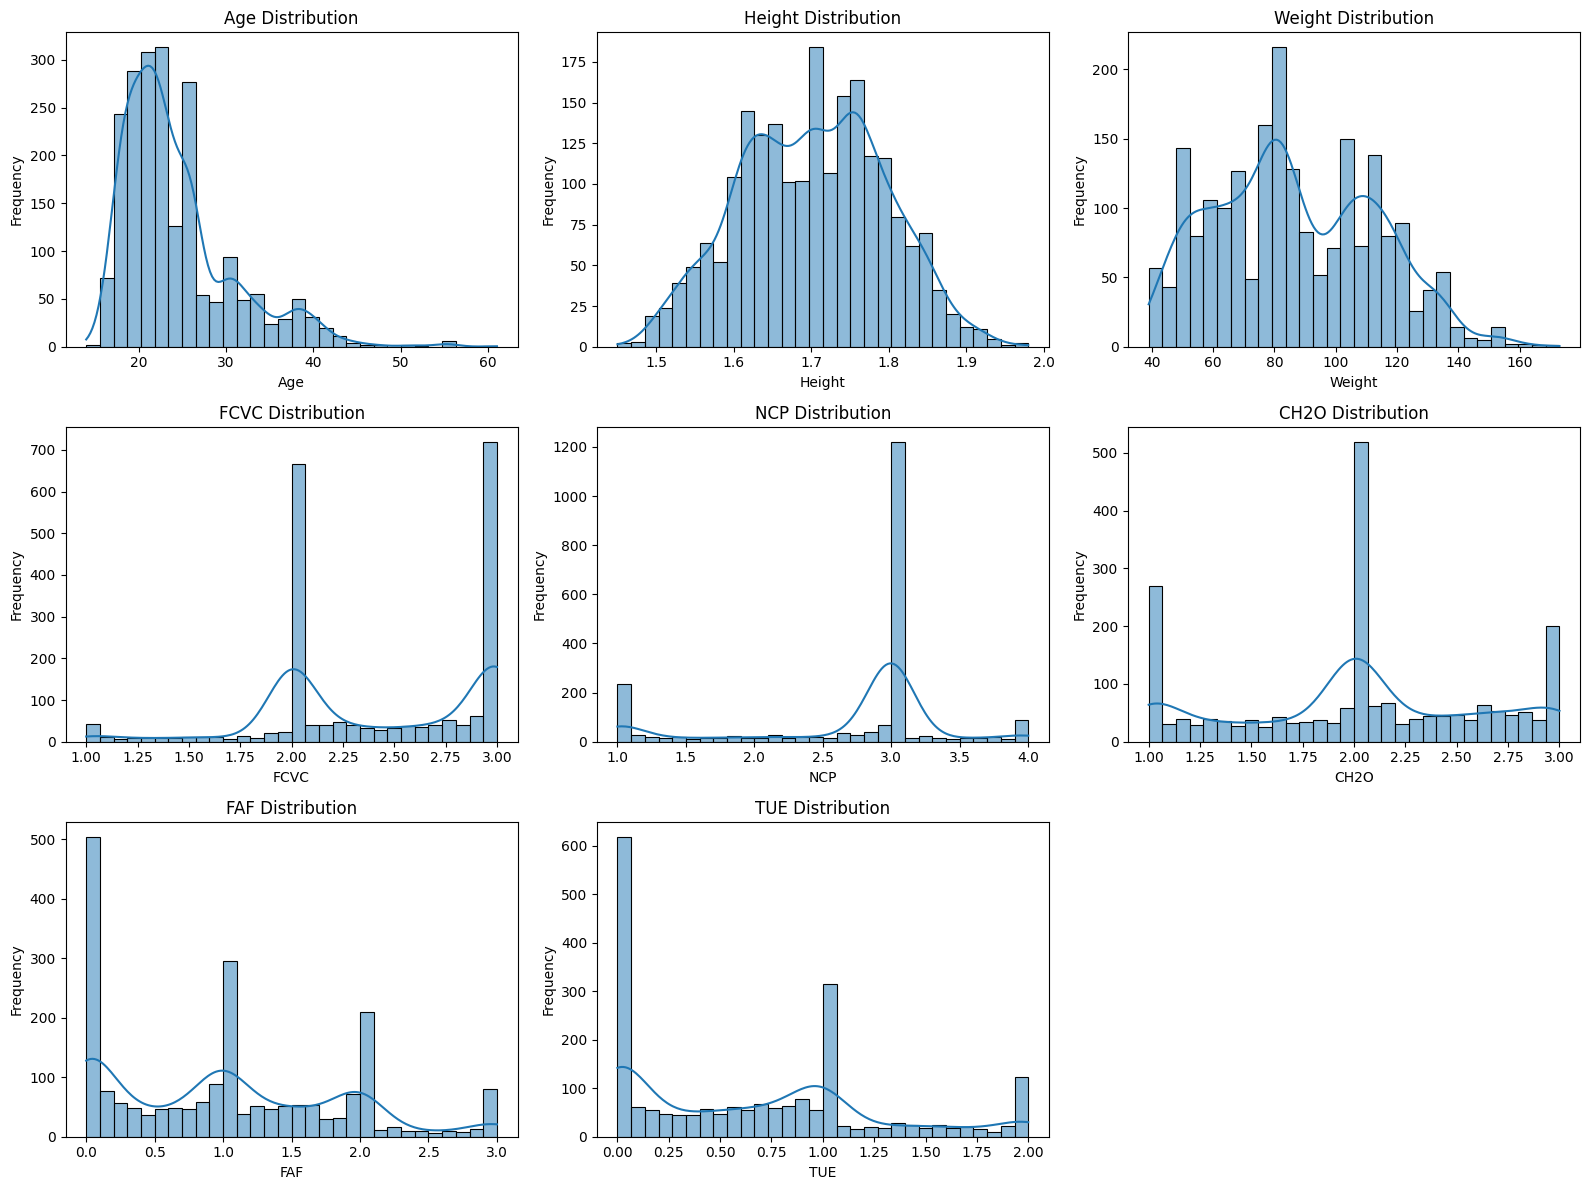

In [6]:
import seaborn as sns

numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(16, 12))
for idx, column in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, idx)
    sns.histplot(df[column].dropna(), kde=True, bins=30)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

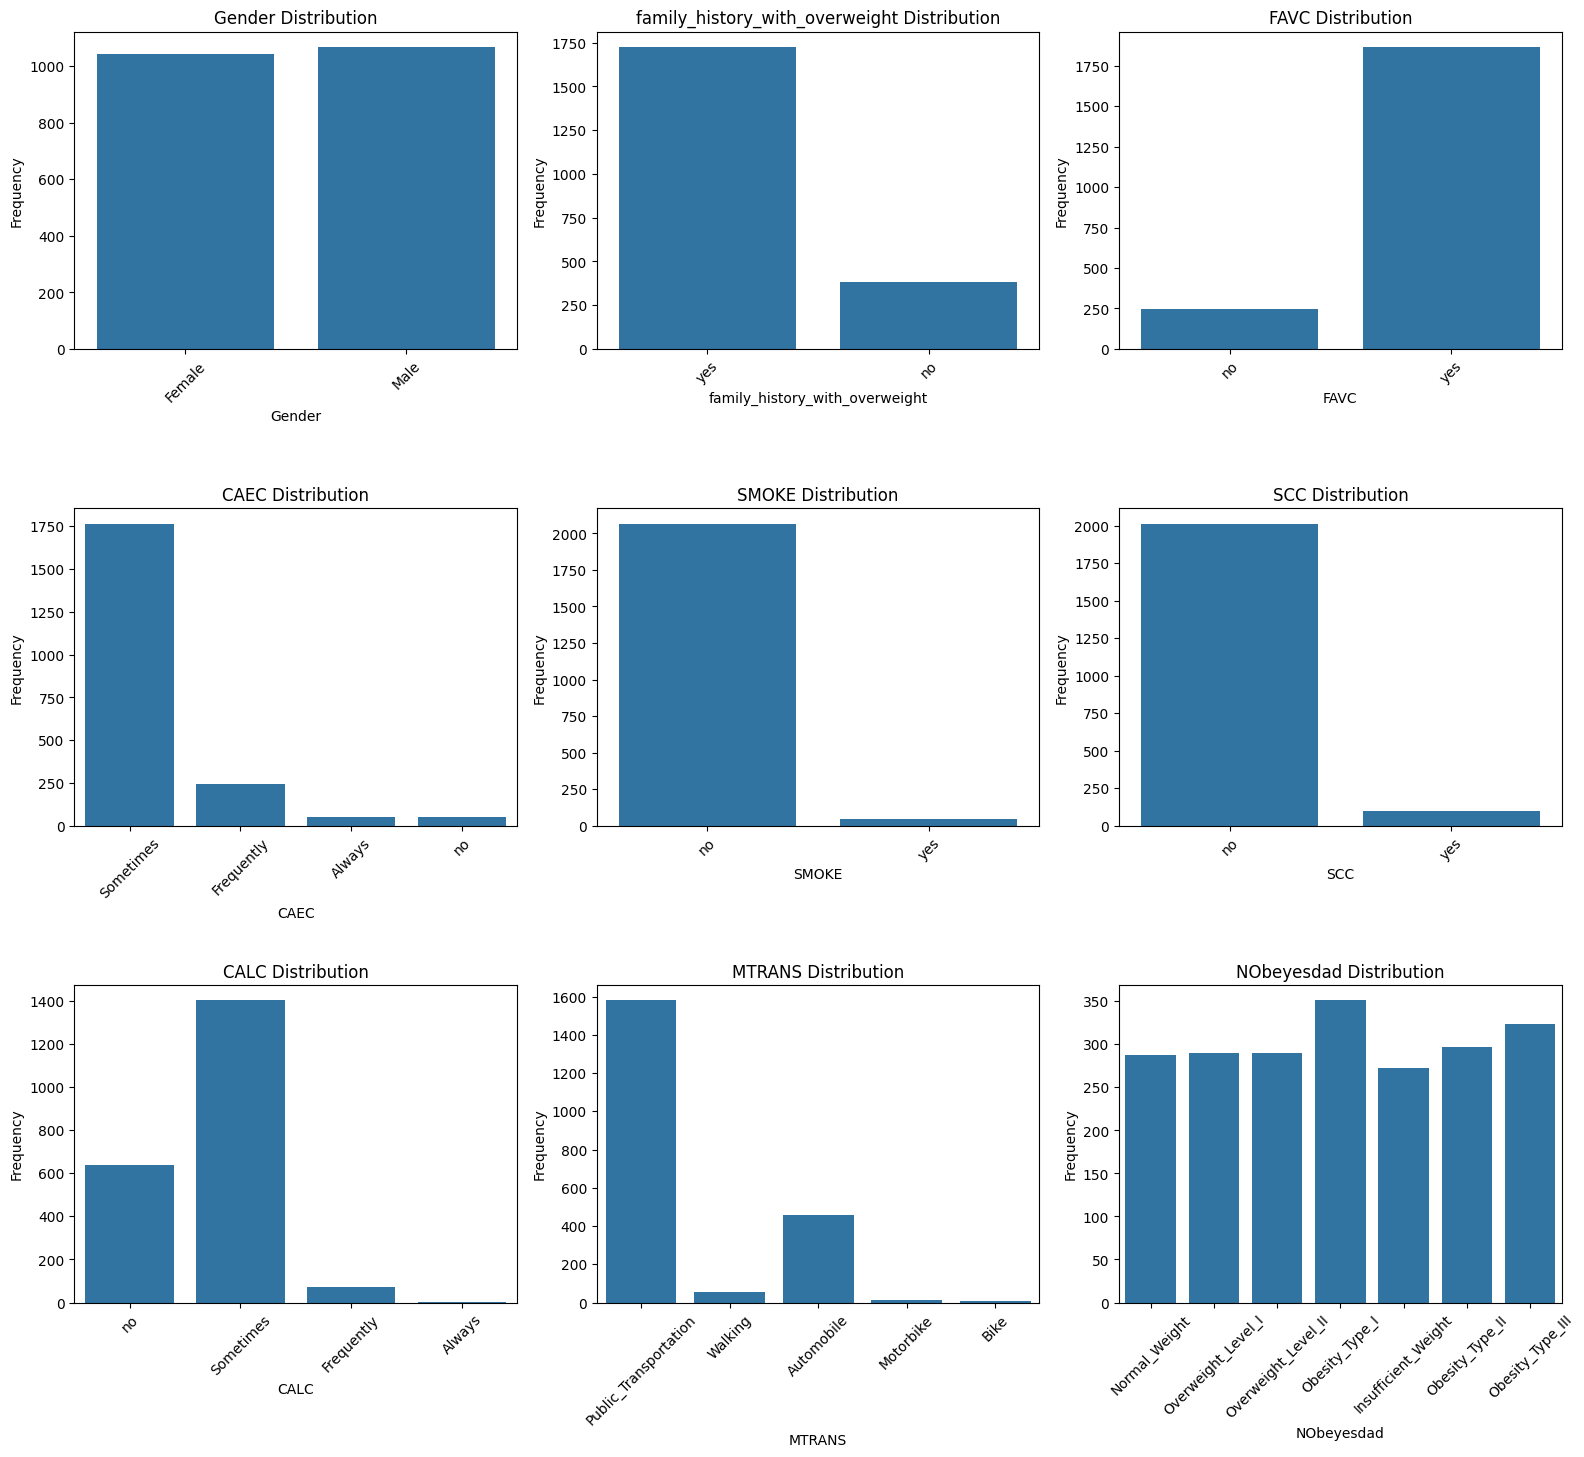

In [7]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(16, 18))
for idx, column in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols) // 3 + 1, 3, idx)
    sns.countplot(x=column, data=df)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Identify unique values for categorical column

In [8]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

unique_values_dict = {}
if not categorical_cols.empty:
    for col in categorical_cols:
        unique_values = df[col].unique()
        unique_values_dict[col] = unique_values

unique_values_dict

{'Gender': array(['Female', 'Male'], dtype=object),
 'family_history_with_overweight': array(['yes', 'no'], dtype=object),
 'FAVC': array(['no', 'yes'], dtype=object),
 'CAEC': array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object),
 'SMOKE': array(['no', 'yes'], dtype=object),
 'SCC': array(['no', 'yes'], dtype=object),
 'CALC': array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object),
 'MTRANS': array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
        'Bike'], dtype=object),
 'NObeyesdad': array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
        'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
        'Obesity_Type_III'], dtype=object)}

## Encoding variables

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

In [10]:
# Display the mapping of original labels to encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


In [11]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,1
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,1
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,1
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,5
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,4
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,4
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,4
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,4


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

one_hot_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), one_hot_columns)], remainder='passthrough')

transformed_data = ct.fit_transform(df)

## Convert transformed data into dataframe

In [13]:
new_column_names = []

# Loop through the one-hot columns to create meaningful names
for column in one_hot_columns:
    categories = ct.named_transformers_['encoder'].categories_[one_hot_columns.index(column)]
    new_column_names.extend([f"{column}_{category}" for category in categories])
    
remaining_columns = df.columns.difference(one_hot_columns + ['NObeyesdad']).tolist()
new_column_names.extend(remaining_columns)

new_column_names.append('NObeyesdad')

transformed_df = pd.DataFrame(transformed_data, columns=new_column_names)

In [14]:
transformed_df

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,MTRANS_Walking,Age,CH2O,FAF,FCVC,Height,NCP,TUE,Weight,NObeyesdad
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,5.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,4.0
2107,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,4.0
2108,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,4.0
2109,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,4.0


## Correlation matrix

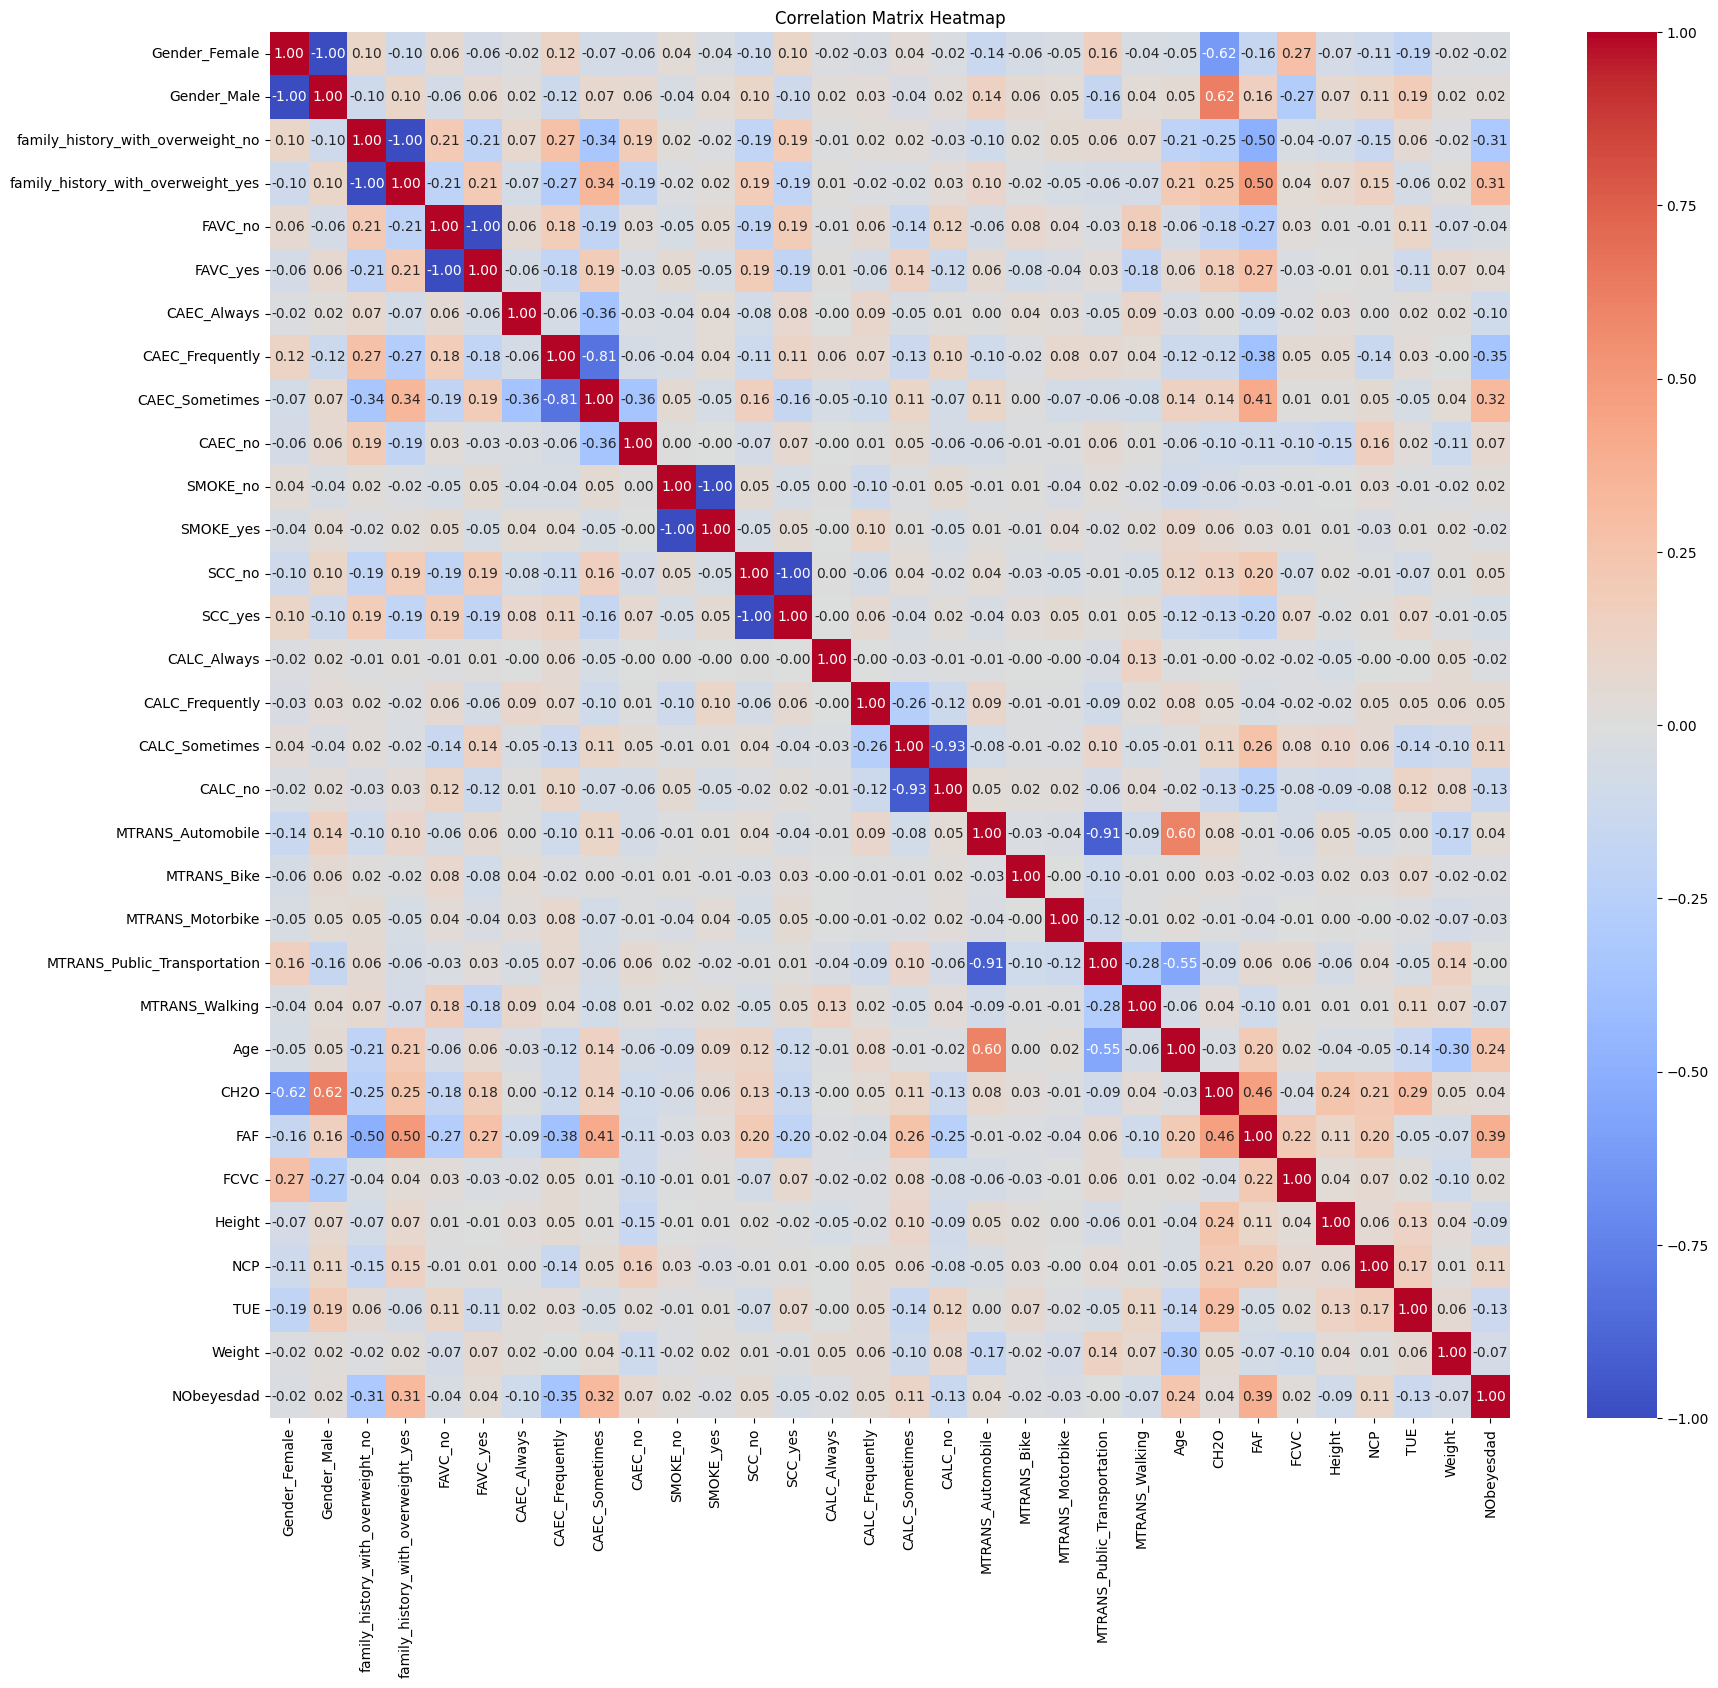

In [15]:
correlation_matrix = transformed_df.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Seperate the dataset

In [16]:
X = transformed_df.drop(columns=['NObeyesdad'])
y = transformed_df['NObeyesdad'].astype(int)

## Splitting the dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [18]:
print(X_train.shape[0], X_test.shape[0])

1688 423


## Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Convert the scaled arrays back to DataFrames for consistency
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled training set
X_train_scaled_df.head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,CH2O,FAF,FCVC,Height,NCP,TUE,Weight
0,1.022771,-1.022771,-0.476177,0.476177,2.743219,-2.743219,-0.155794,-0.356140,-2.281640,6.260230,...,0.570053,-0.167376,-0.198810,-0.763925,-1.204128,1.079905,0.409406,-0.016176,1.160754,0.553328
1,-0.977736,0.977736,2.100061,-2.100061,-0.364535,0.364535,-0.155794,2.807884,-2.281640,-0.159739,...,-1.754222,-0.167376,2.211712,-0.017992,-0.328109,1.079905,0.409406,-0.016176,-1.184989,-1.076849
2,1.022771,-1.022771,-0.476177,0.476177,-0.364535,0.364535,-0.155794,-0.356140,0.438281,-0.159739,...,0.570053,-0.167376,-0.973731,1.277437,2.113413,1.079905,0.409406,1.150686,1.160488,0.249763
3,1.022771,-1.022771,2.100061,-2.100061,2.743219,-2.743219,-0.155794,-0.356140,0.438281,-0.159739,...,0.570053,-0.167376,-1.002317,-1.190172,-1.280304,-2.648107,0.409406,-1.648268,-0.012117,2.183506
4,1.022771,-1.022771,-0.476177,0.476177,-0.364535,0.364535,-0.155794,-0.356140,0.438281,-0.159739,...,-1.754222,-0.167376,2.608052,-1.520461,-0.343287,-0.784101,0.409406,-0.714106,-1.184989,-1.076849


# Model Evaluation

In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    'SVM': SVC(kernel='linear', random_state=1),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=1)
}

Model: SVM
Accuracy: 0.9196
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        61
           1       0.90      0.78      0.83        45
           2       0.99      0.89      0.93        79
           3       0.90      1.00      0.95        54
           4       1.00      0.98      0.99        63
           5       0.88      0.84      0.86        61
           6       0.83      0.97      0.89        60

    accuracy                           0.92       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.92      0.92      0.92       423

Confusion Matrix:


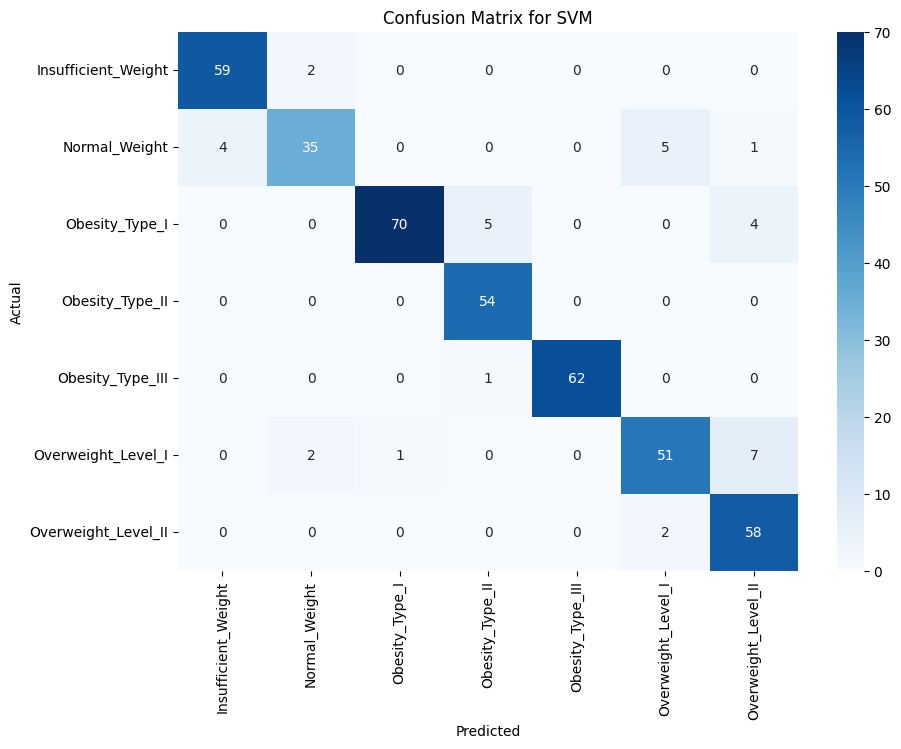

Model: Random Forest
Accuracy: 0.9385
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        61
           1       0.73      0.96      0.83        45
           2       0.97      0.92      0.95        79
           3       0.98      1.00      0.99        54
           4       1.00      1.00      1.00        63
           5       0.98      0.79      0.87        61
           6       0.93      0.95      0.94        60

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.95      0.94      0.94       423

Confusion Matrix:


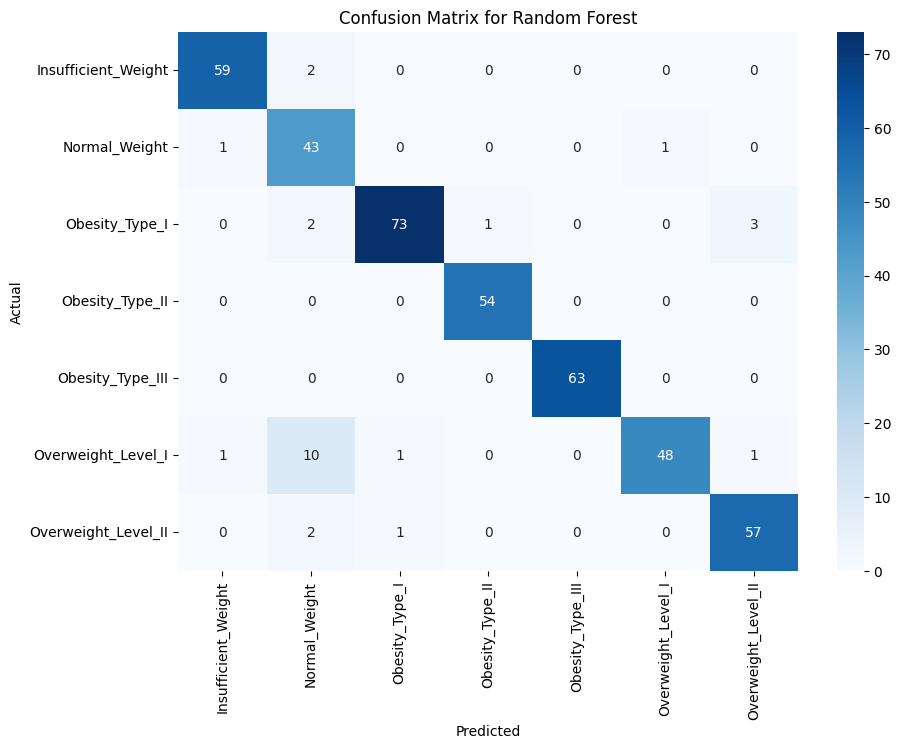

Model: Gradient Boosting
Accuracy: 0.9622
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       0.91      0.93      0.92        45
           2       0.97      0.97      0.97        79
           3       0.96      1.00      0.98        54
           4       1.00      0.98      0.99        63
           5       0.95      0.90      0.92        61
           6       0.93      0.95      0.94        60

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423

Confusion Matrix:


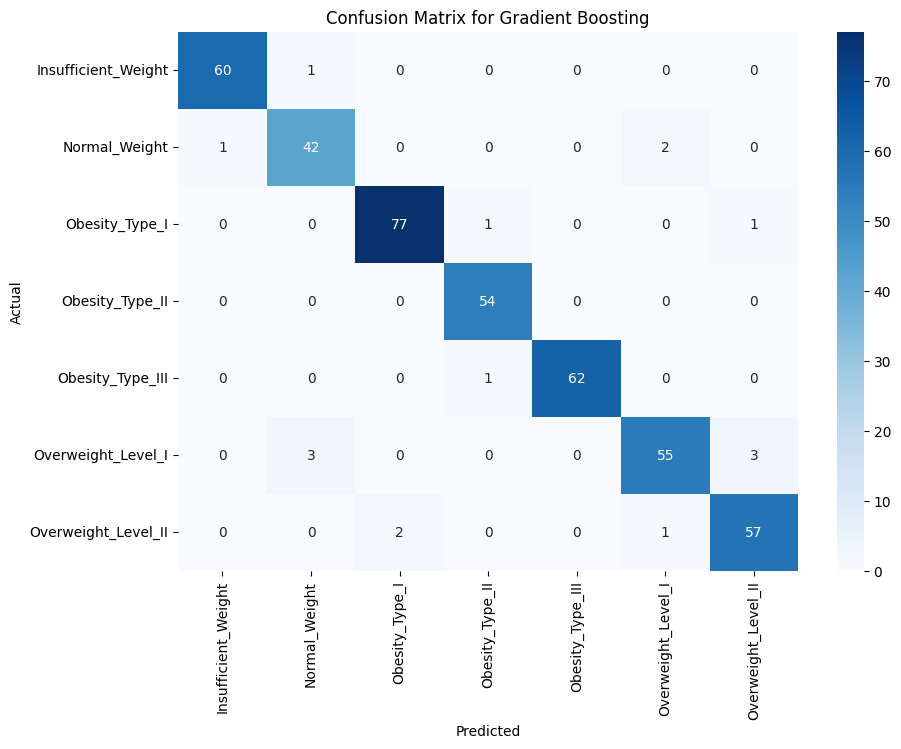

In [22]:
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(class_report)
    print("Confusion Matrix:")
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()